# <font color = maroon>Lead Scoring Case Study</font>

### 1. Importing all the required libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# importing matplotlib and seabor
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

#importing libraries for model building
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### 2. Reading the data from csv file to Pandas dataframe

In [2]:
Lead_data = pd.read_csv("Leads.csv")
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape of the dataframe
Lead_data.shape

(9240, 37)

In [4]:
#Data types of each column in Lead dataset
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# printing the numerical analysis for columns in Lead data
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 3. Missing Values treatment

In [6]:
# Converting the values 'Select' in the database to Nan because'Select' means that the user has not selected any value
# which is as good as a null value
Lead_data = Lead_data.replace('Select', np.nan)

In [7]:
# Checking the null values for each column
Lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Finding the percentage of missing values in Lead_data dataframe and printing it in descending order
# so that the columns with the most number of missing values come at the top
Lead_missing = Lead_data.count()/len(Lead_data)
Lead_missing = (1-Lead_missing)*100
Lead_missing.sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

- There are some columns which have null values greater than 40%. Keeping these columns can result in building a wrong model so we will drop these columns

In [9]:
# Dropping columns with null values greater than 40 %
Lead_data.drop(["How did you hear about X Education",
                "Lead Profile",
                "Lead Quality",
                "Asymmetrique Profile Score",
                "Asymmetrique Activity Score",
                "Asymmetrique Profile Index",
                "Asymmetrique Activity Index"],axis = 1, inplace = True)

In [10]:
# Checking Missing values again
Lead_missing = Lead_data.count()/len(Lead_data)
Lead_missing = (1-Lead_missing)*100
Lead_missing.sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Number                                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.0000

#### City Column

In [11]:
Lead_data.City.value_counts(normalize = True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

More than 50% of the data in City column is Mumbai, keeping this column will not give any useful insight into the data so it is better to drop this column

In [12]:
# Dropping city column
Lead_data.drop(["City"],axis = 1, inplace = True)

#### Country Column

In [13]:
Lead_data.Country.value_counts(normalize = True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Germany                 0.000590
Kuwait                  0.000590
South Africa            0.000590
Canada                  0.000590
Nigeria                 0.000590
Sweden                  0.000443
Uganda                  0.000295
Netherlands             0.000295
China                   0.000295
Ghana                   0.000295
Belgium                 0.000295
Asia/Pacific Region     0.000295
Bangladesh              0.000295
Philippines             0.000295
Italy                   0.000295
Denmark                 0.000148
Indonesia               0.000148
Kenya     

More than 95% of the data in Country column is India, keeping this column will not give any useful insight into the data so it is better to drop this column

In [14]:
# Dropping city column
Lead_data.drop(["Country"],axis = 1, inplace = True)

#### Specialization column

In [15]:
Lead_data.Specialization.value_counts(normalize = True,dropna = False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [16]:
# Dropping Specialization column as the null values in the column are very high with respect to all other values
Lead_data.drop(["Specialization"],axis = 1, inplace = True)

#### Tags Column

In [17]:
Lead_data.Tags.value_counts(normalize = True,dropna = False)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

- Tag column is a column which have values after the call has been made to a student. This will not be useful for predicting whether a customer will get converted or not.

In [18]:
# Removing Tags Column
Lead_data.drop(["Tags"],axis = 1, inplace = True)

#### What matters most to you in choosing a course column

In [19]:
Lead_data["What matters most to you in choosing a course"].value_counts(normalize = True,dropna = False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

More than 70% of the data in "What matters most to you in choosing a course" column is "Better Career Prospects", keeping this column will not give any useful insight into the data so it is better to drop this column

In [20]:
Lead_data.drop(["What matters most to you in choosing a course"],axis = 1,inplace = True)

#### What is your current occupation column

In [21]:
Lead_data["What is your current occupation"].value_counts(normalize = True,dropna = False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [22]:
# Imputing the NaN values in "What is your current occupation" column to mode values that is "Unemployed"
Lead_data["What is your current occupation"] = Lead_data["What is your current occupation"].replace(np.nan, 'Unemployed')

In [23]:
# Checking Missing values again
Lead_missing = Lead_data.count()/len(Lead_data)
Lead_missing = (1-Lead_missing)*100
Lead_missing.sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Last Notable Activity                       0.000000
What is your current occupation             0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
Total Time Spent on Website                 0.000000
Search                                      0.000000
A free copy of Mastering The Interview      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

- Since the null values in the columns TotalVisits, Page Views Per Visit, Last Activity and Lead Source is very less, we can drop the rows which have null values for these columns

In [24]:
Lead_data = Lead_data[~pd.isnull(Lead_data['TotalVisits'])]

In [25]:
# Checking Missing values again
Lead_missing = Lead_data.count()/len(Lead_data)
Lead_missing = (1-Lead_missing)*100
Lead_missing.sort_values(ascending = False)

Lead Source                                 0.318576
Last Notable Activity                       0.000000
What is your current occupation             0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.000000
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.000000
Last Activity                               0.000000
Search                                      0.000000
A free copy of Mastering The Interview      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

In [26]:
Lead_data = Lead_data[~pd.isnull(Lead_data['Lead Source'])]

In [27]:
# Checking Missing values again
Lead_missing = Lead_data.count()/len(Lead_data)
Lead_missing = (1-Lead_missing)*100
Lead_missing.sort_values(ascending = False)

Last Notable Activity                       0.0
What is your current occupation             0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
A free copy of Mastering The Interview      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [28]:
# Checking the missing values in the whole Lead_data dataframe
Lead_data.isnull().sum().sum()

0

- There are no missing values present in the data. Now we can move to checking for outliers in the data and treating them if present

### 4. Data Quality and Outlier Treatment

In [29]:
# printing the column names of dataset Lead_data
Lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [30]:
# checking the values of Prospect ID variable so that no outliers or incorrect values are present
Lead_data["Prospect ID"].value_counts()

06251568-3990-42b4-aaf0-eff15c51a340    1
2961d8b9-3c2e-46a0-be05-8602c79d6335    1
a91c3c64-59b0-4697-aa07-05fd4e385947    1
b7ceed88-7bcf-4cd6-a1f7-a4b163dcc8ec    1
884b7c34-d951-497f-b9e6-de959d08d000    1
                                       ..
8f8a1bb0-7933-41d2-8a4f-17a2123d7e50    1
02a3017e-d3b2-4b2b-81f0-9ae7604e3edb    1
425a753e-1c30-4216-8a32-2a1b9b8c3e22    1
810e3543-20d8-4b8b-bb70-9a739a743595    1
612f48fb-8987-47e7-957a-2b824ed3ab3e    1
Name: Prospect ID, Length: 9074, dtype: int64

In [31]:
# Checking the Unique values in Prospect_ID
Lead_data["Prospect ID"].nunique()

9074

- Since there are all unique values present in the column Prospect ID, it will not be any use to us while building a model so this column can be dropped

In [32]:
Lead_data.drop(["Prospect ID"], axis = 1, inplace = True)

In [33]:
# checking the values of Lead Number variable so that no outliers or incorrect values are present
Lead_data["Lead Number"].value_counts()

608255    1
656682    1
634167    1
625971    1
646449    1
         ..
582137    1
643807    1
600800    1
598753    1
655360    1
Name: Lead Number, Length: 9074, dtype: int64

In [34]:
# Checking the Unique values in Prospect_ID
Lead_data["Lead Number"].nunique()

9074

- Since there are all unique values present in the column Lead Number, it will not be any use to us while building a model so this column can be dropped

In [35]:
Lead_data.drop(["Lead Number"], axis = 1, inplace = True)

In [36]:
# checking the values of Lead Origin variable so that no outliers or incorrect values are present
Lead_data["Lead Origin"].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [37]:
# checking the values of Lead Source variable so that no outliers or incorrect values are present
Lead_data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
blog                    1
WeLearn                 1
NC_EDM                  1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [38]:
#Combining the values to make the data organized
Lead_data["Lead Source"] = Lead_data["Lead Source"].replace(["Welingak Website","Referral Sites",
                                                             "Facebook","bing","google","Click2call","Press_Release",
                                                             "Social Media","Live Chat","testone","blog","WeLearn",
                                                             "NC_EDM","welearnblog_Home","Pay per Click Ads",
                                                             "youtubechannel"],"Others")

In [39]:
# checking the values of Lead Source variable so that no outliers or incorrect values are present
Lead_data["Lead Source"].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Reference          443
Others             313
Name: Lead Source, dtype: int64

In [40]:
# checking the values of Do Not Email variable so that no outliers or incorrect values are present
Lead_data["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [41]:
# checking the values of Do Not Call variable so that no outliers or incorrect values are present
Lead_data["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

- Since most of the values in Do Not Call column is No, there is no point in analysing this column so this column can be dropped

In [42]:
Lead_data.drop(["Do Not Call"],axis = 1, inplace = True)

In [43]:
# checking the values of Converted variable so that no outliers or incorrect values are present
Lead_data["Converted"].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

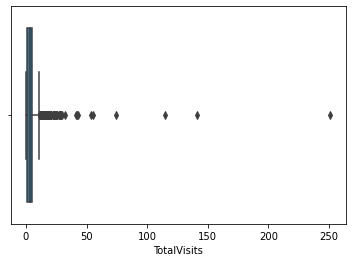

In [44]:
# plotting values in TotalVisits in a box plot to find out the outliers
sns.boxplot(Lead_data.TotalVisits)
plt.show()

In [45]:
# checking the values of TotalVisits variable and the percentage of each value
Lead_data.TotalVisits.value_counts(normalize=True)*100

0.0      23.815296
2.0      18.503416
3.0      14.392771
4.0      12.342958
5.0       8.629050
6.0       5.135552
1.0       4.353097
7.0       3.405334
8.0       2.468592
9.0       1.807362
10.0      1.256337
11.0      0.947763
13.0      0.528984
12.0      0.495922
14.0      0.396738
16.0      0.231430
15.0      0.198369
17.0      0.176328
18.0      0.165307
20.0      0.132246
19.0      0.099184
23.0      0.066123
21.0      0.066123
27.0      0.055102
24.0      0.055102
25.0      0.055102
22.0      0.033061
28.0      0.022041
29.0      0.022041
26.0      0.022041
251.0     0.011020
74.0      0.011020
30.0      0.011020
141.0     0.011020
54.0      0.011020
41.0      0.011020
115.0     0.011020
43.0      0.011020
42.0      0.011020
32.0      0.011020
55.0      0.011020
Name: TotalVisits, dtype: float64

- There are outliers present in the column TotalVisits which only comprise of very small percentage of the whole data. As maximum number of users have TotalVisits less than 25 the records with outliers can be removed from the dataset

In [46]:
Lead_data = Lead_data[~(Lead_data['TotalVisits']>25)]

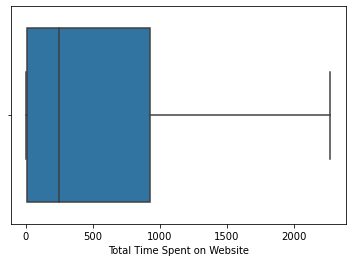

In [47]:
# plotting values in "Total Time Spent on Website" in a box plot to find out the outliers
sns.boxplot(Lead_data["Total Time Spent on Website"])
plt.show()

- No outliers are present in "Total Time Spent on Website"

In [48]:
# checking the values of Page Views Per Visit variable and the percentage of each value
Lead_data["Page Views Per Visit"].value_counts(normalize=True)*100

0.00    23.873177
2.00    19.818825
3.00    13.212550
4.00     9.887318
1.00     7.191781
          ...    
3.43     0.011047
1.45     0.011047
1.54     0.011047
3.29     0.011047
3.57     0.011047
Name: Page Views Per Visit, Length: 101, dtype: float64

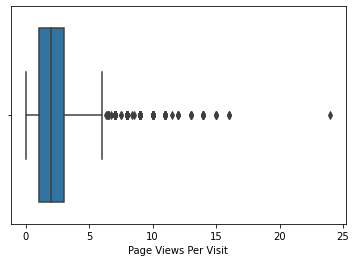

In [49]:
# plotting values in "Page Views Per Visit" in a box plot to find out the outliers
sns.boxplot(Lead_data["Page Views Per Visit"])
plt.show()

In [50]:
#Checking the count of the Page Views Per Visit greater than 9
Lead_data["Page Views Per Visit"][Lead_data["Page Views Per Visit"] > 9].sum()

832.5

In [51]:
#Removing the values with Page Views Per Visit greater than 9
Lead_data = Lead_data[~(Lead_data['Page Views Per Visit']>9)]

In [52]:
Lead_data.shape

(8982, 22)

In [53]:
# checking the values of Last Activity variable and the percentage of each value
Lead_data["Last Activity"].value_counts()

Email Opened                    3400
SMS Sent                        2690
Olark Chat Conversation          968
Page Visited on Website          619
Converted to Lead                428
Email Bounced                    311
Email Link Clicked               264
Form Submitted on Website        115
Unreachable                       88
Unsubscribed                      58
Had a Phone Conversation          25
Approached upfront                 5
View in browser link Clicked       5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

- Last Activity column is a column which have values after the call has been made to a student. This will not be useful for predicting whether a customer will get converted or not.

In [54]:
Lead_data.drop(["Last Activity"],axis = 1, inplace = True)

In [55]:
Lead_data["What is your current occupation"].value_counts()

Unemployed              8077
Working Professional     670
Student                  204
Other                     15
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [56]:
Lead_data["Search"].value_counts()

No     8968
Yes      14
Name: Search, dtype: int64

- Since most the values in Search column is No, there is no point in analysing this column so this column can be dropped

In [57]:
Lead_data.drop(["Search"],axis = 1, inplace = True)

In [58]:
Lead_data["Magazine"].value_counts()

No    8982
Name: Magazine, dtype: int64

- Since all the values in Magazine column is No, there is no point in analysing this column so this column can be dropped

In [59]:
Lead_data.drop(["Magazine"],axis = 1, inplace = True)

In [60]:
Lead_data["Newspaper Article"].value_counts()

No     8980
Yes       2
Name: Newspaper Article, dtype: int64

- Since most of the values in Newspaper Article column is No, there is no point in analysing this column so this column can be dropped

In [61]:
Lead_data.drop(["Newspaper Article"],axis = 1, inplace = True)

In [62]:
Lead_data["X Education Forums"].value_counts()

No     8981
Yes       1
Name: X Education Forums, dtype: int64

- Since most of the values in X Education Forums column is No, there is no point in analysing this column so this column can be dropped

In [63]:
Lead_data.drop(["X Education Forums"],axis = 1, inplace = True)

In [64]:
Lead_data.shape

(8982, 17)

In [65]:
Lead_data["Newspaper"].value_counts()

No     8981
Yes       1
Name: Newspaper, dtype: int64

- Since most of the values in Newspaper column is No, there is no point in analysing this column so this column can be dropped

In [66]:
Lead_data.drop(["Newspaper"],axis = 1, inplace = True)

In [67]:
Lead_data["Digital Advertisement"].value_counts()

No     8978
Yes       4
Name: Digital Advertisement, dtype: int64

- Since most of the values in Digital Advertisement column is No, there is no point in analysing this column so this column can be dropped

In [68]:
Lead_data.drop(["Digital Advertisement"],axis = 1, inplace = True)

In [69]:
Lead_data["Through Recommendations"].value_counts()

No     8975
Yes       7
Name: Through Recommendations, dtype: int64

In [70]:
Lead_data.drop(["Through Recommendations"],axis = 1, inplace = True)

In [71]:
Lead_data["Receive More Updates About Our Courses"].value_counts()

No    8982
Name: Receive More Updates About Our Courses, dtype: int64

- Since all of the values in "Receive More Updates About Our Courses" column is No, there is no point in analysing this column so this column can be dropped

In [72]:
Lead_data.drop(["Receive More Updates About Our Courses"],axis = 1, inplace = True)

In [73]:
Lead_data["Update me on Supply Chain Content"].value_counts()

No    8982
Name: Update me on Supply Chain Content, dtype: int64

- Since all of the values in "Update me on Supply Chain Content" column is No, there is no point in analysing this column so this column can be dropped

In [74]:
Lead_data.drop(["Update me on Supply Chain Content"],axis = 1, inplace = True)

In [75]:
Lead_data["Get updates on DM Content"].value_counts()

No    8982
Name: Get updates on DM Content, dtype: int64

- Since all of the values in "Get updates on DM Content" column is No, there is no point in analysing this column so this column can be dropped

In [76]:
Lead_data.drop(["Get updates on DM Content"],axis = 1, inplace = True)

In [77]:
Lead_data["I agree to pay the amount through cheque"].value_counts()

No    8982
Name: I agree to pay the amount through cheque, dtype: int64

- Since all of the values in "I agree to pay the amount through cheque" column is No, there is no point in analysing this column so this column can be dropped

In [78]:
Lead_data.drop(["I agree to pay the amount through cheque"],axis = 1, inplace = True)

In [79]:
Lead_data["A free copy of Mastering The Interview"].value_counts()

No     6146
Yes    2836
Name: A free copy of Mastering The Interview, dtype: int64

In [80]:
Lead_data["Last Notable Activity"].value_counts()

Modified                        3232
Email Opened                    2798
SMS Sent                        2133
Page Visited on Website          309
Olark Chat Conversation          183
Email Link Clicked               170
Email Bounced                     60
Unsubscribed                      44
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

- Last Notable Activity is the last activity performed by a student, As a customer will be converted to student only after the Lead gets converted, this feature will not be used for predicting whether a Lead will successfully get converted to a student or not so this can be dropped.

In [81]:
Lead_data.drop(["Last Notable Activity"],axis = 1, inplace = True)

- The data quality of all the columns are checked and the outliers are treated

In [82]:
Lead_data.shape

(8982, 9)

### 5. EDA

In [83]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8982 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8982 non-null   object 
 1   Lead Source                             8982 non-null   object 
 2   Do Not Email                            8982 non-null   object 
 3   Converted                               8982 non-null   int64  
 4   TotalVisits                             8982 non-null   float64
 5   Total Time Spent on Website             8982 non-null   int64  
 6   Page Views Per Visit                    8982 non-null   float64
 7   What is your current occupation         8982 non-null   object 
 8   A free copy of Mastering The Interview  8982 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 701.7+ KB


### Univariate Analysis

#### Lead Origin

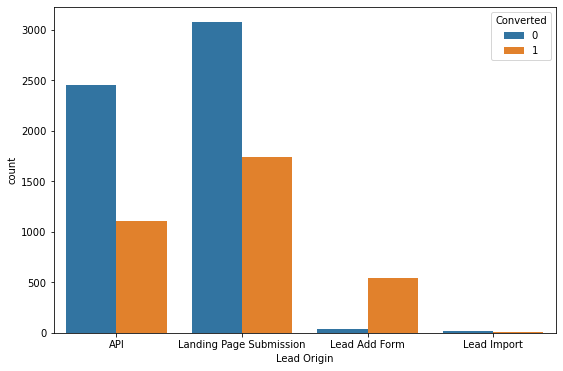

In [84]:
#Plotting a countplot with the target variable
plt.figure(figsize = (9,6))
sns.countplot(x = "Lead Origin", hue = "Converted", data = Lead_data)
plt.show()

##### Inference
- `API` and `Landing Page Submission` has a good conversion rate.
- `Lead Add Form` has more than 90% conversion rate but the count is very less.
- `Lead Import` are very less in count.

#### Lead Source

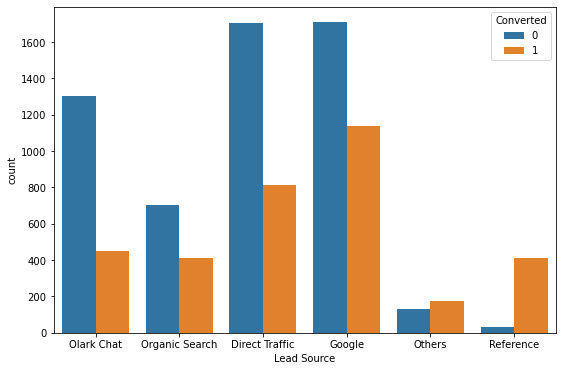

In [85]:
#Plotting a countplot for the Lead Source variable with the target variable
plt.subplots(figsize = (9,6))
sns.countplot(x = "Lead Source", hue = "Converted", data = Lead_data)
plt.show()

##### Inference
- `Google` and `Direct Traffic Lead Source` is generating maximum number of leads.
- Conversion rate of `Others` and `Google` is high.

#### Do Not Email 

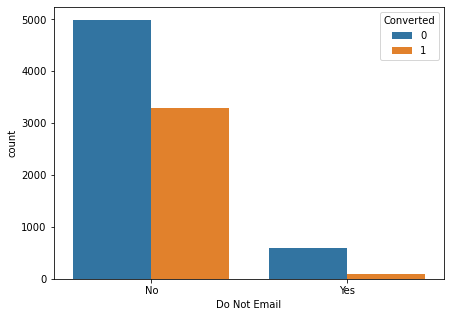

In [86]:
#Plotting subplots for Do Not Email 
plt.subplots(figsize = (7,5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = Lead_data)
plt.show()

### Bivariate Analysis

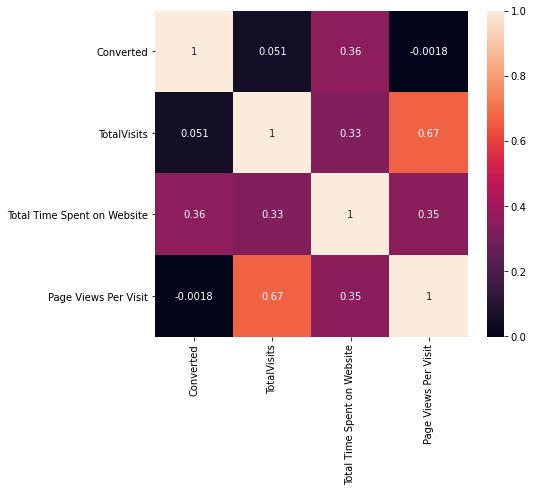

In [87]:
#plotting a heatmap for the numerical variables
plt.figure(figsize = (7,6))
sns.heatmap(Lead_data.corr(),annot = True)
plt.show()

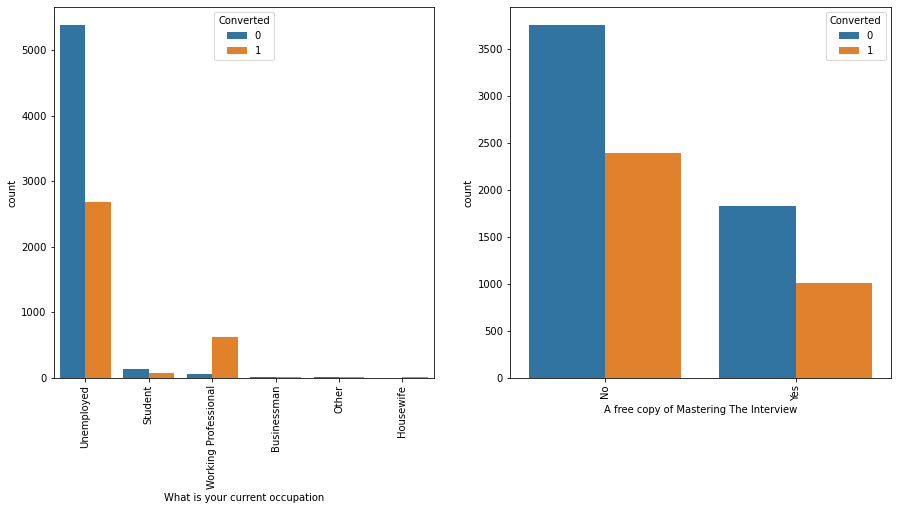

In [88]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x = 'What is your current occupation', hue='Converted', data=Lead_data)
xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = 'A free copy of Mastering The Interview', hue='Converted', data=Lead_data)
xticks(rotation = 90)

plt.show()

- Customers with occupation as Unemployed have the least conversion rate
- Working Professional have the highest conversion rate
- There are more customers who didnt opt for a free copy of Mastering the Interview than there are who did opt

In [89]:
Lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,No


### 6. Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [90]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
Lead_data[varlist] = Lead_data[varlist].apply(binary_map)

In [91]:
Lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,0


In [92]:
# Renaming some categorical columns as they have a very long names
Lead_data.rename(columns = {'What is your current occupation':'Occupation',
                            'A free copy of Mastering The Interview':'MasteringInterview'},inplace = True)

In [93]:
Lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Occupation,MasteringInterview
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [94]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8982 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  8982 non-null   object 
 1   Lead Source                  8982 non-null   object 
 2   Do Not Email                 8982 non-null   int64  
 3   Converted                    8982 non-null   int64  
 4   TotalVisits                  8982 non-null   float64
 5   Total Time Spent on Website  8982 non-null   int64  
 6   Page Views Per Visit         8982 non-null   float64
 7   Occupation                   8982 non-null   object 
 8   MasteringInterview           8982 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1021.7+ KB


In [95]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Lead_data[['Lead Origin', 'Lead Source', 'Occupation']], drop_first=True)

# Adding the results to the master dataframe
Lead_data = pd.concat([Lead_data, dummy1], axis=1)

In [96]:
Lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Occupation,MasteringInterview,Lead Origin_Landing Page Submission,...,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0,0,...,0,1,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0,0,...,0,0,1,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,1,1,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,0,1,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,0,1,...,1,0,0,0,0,0,0,0,1,0


In [97]:
# We have created dummies for the below variables, so we can drop them
Lead_data = Lead_data.drop(['Lead Origin', 'Lead Source', 'Occupation'], 1)

In [98]:
Lead_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,MasteringInterview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [99]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8982 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Do Not Email                         8982 non-null   int64  
 1   Converted                            8982 non-null   int64  
 2   TotalVisits                          8982 non-null   float64
 3   Total Time Spent on Website          8982 non-null   int64  
 4   Page Views Per Visit                 8982 non-null   float64
 5   MasteringInterview                   8982 non-null   int64  
 6   Lead Origin_Landing Page Submission  8982 non-null   uint8  
 7   Lead Origin_Lead Add Form            8982 non-null   uint8  
 8   Lead Origin_Lead Import              8982 non-null   uint8  
 9   Lead Source_Google                   8982 non-null   uint8  
 10  Lead Source_Olark Chat               8982 non-null   uint8  
 11  Lead Source_Organic Search    

### 7. Test-Train data Split

In [100]:
# Putting feature variable to X
X = Lead_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,MasteringInterview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [101]:
# Putting target variable to y
y = Lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [102]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [103]:
X_train.shape

(6287, 18)

### 8. Feature Scaling

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,MasteringInterview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
697,0,-0.386239,-0.207206,-0.147908,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1708,0,-0.071041,-0.369720,0.378441,1,1,0,0,0,0,1,0,0,0,0,0,1,0
2196,0,0.244157,1.879625,0.904790,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7113,0,-0.071041,0.265563,-0.411082,1,1,0,0,1,0,0,0,0,0,0,0,0,1
196,0,0.244157,-0.247834,0.904790,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [106]:
### Checking the Converted Rate
Converted_rate = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Converted_rate

37.82008461367179

- The dataset have almost 38% conversion rate

### 9. Correlations

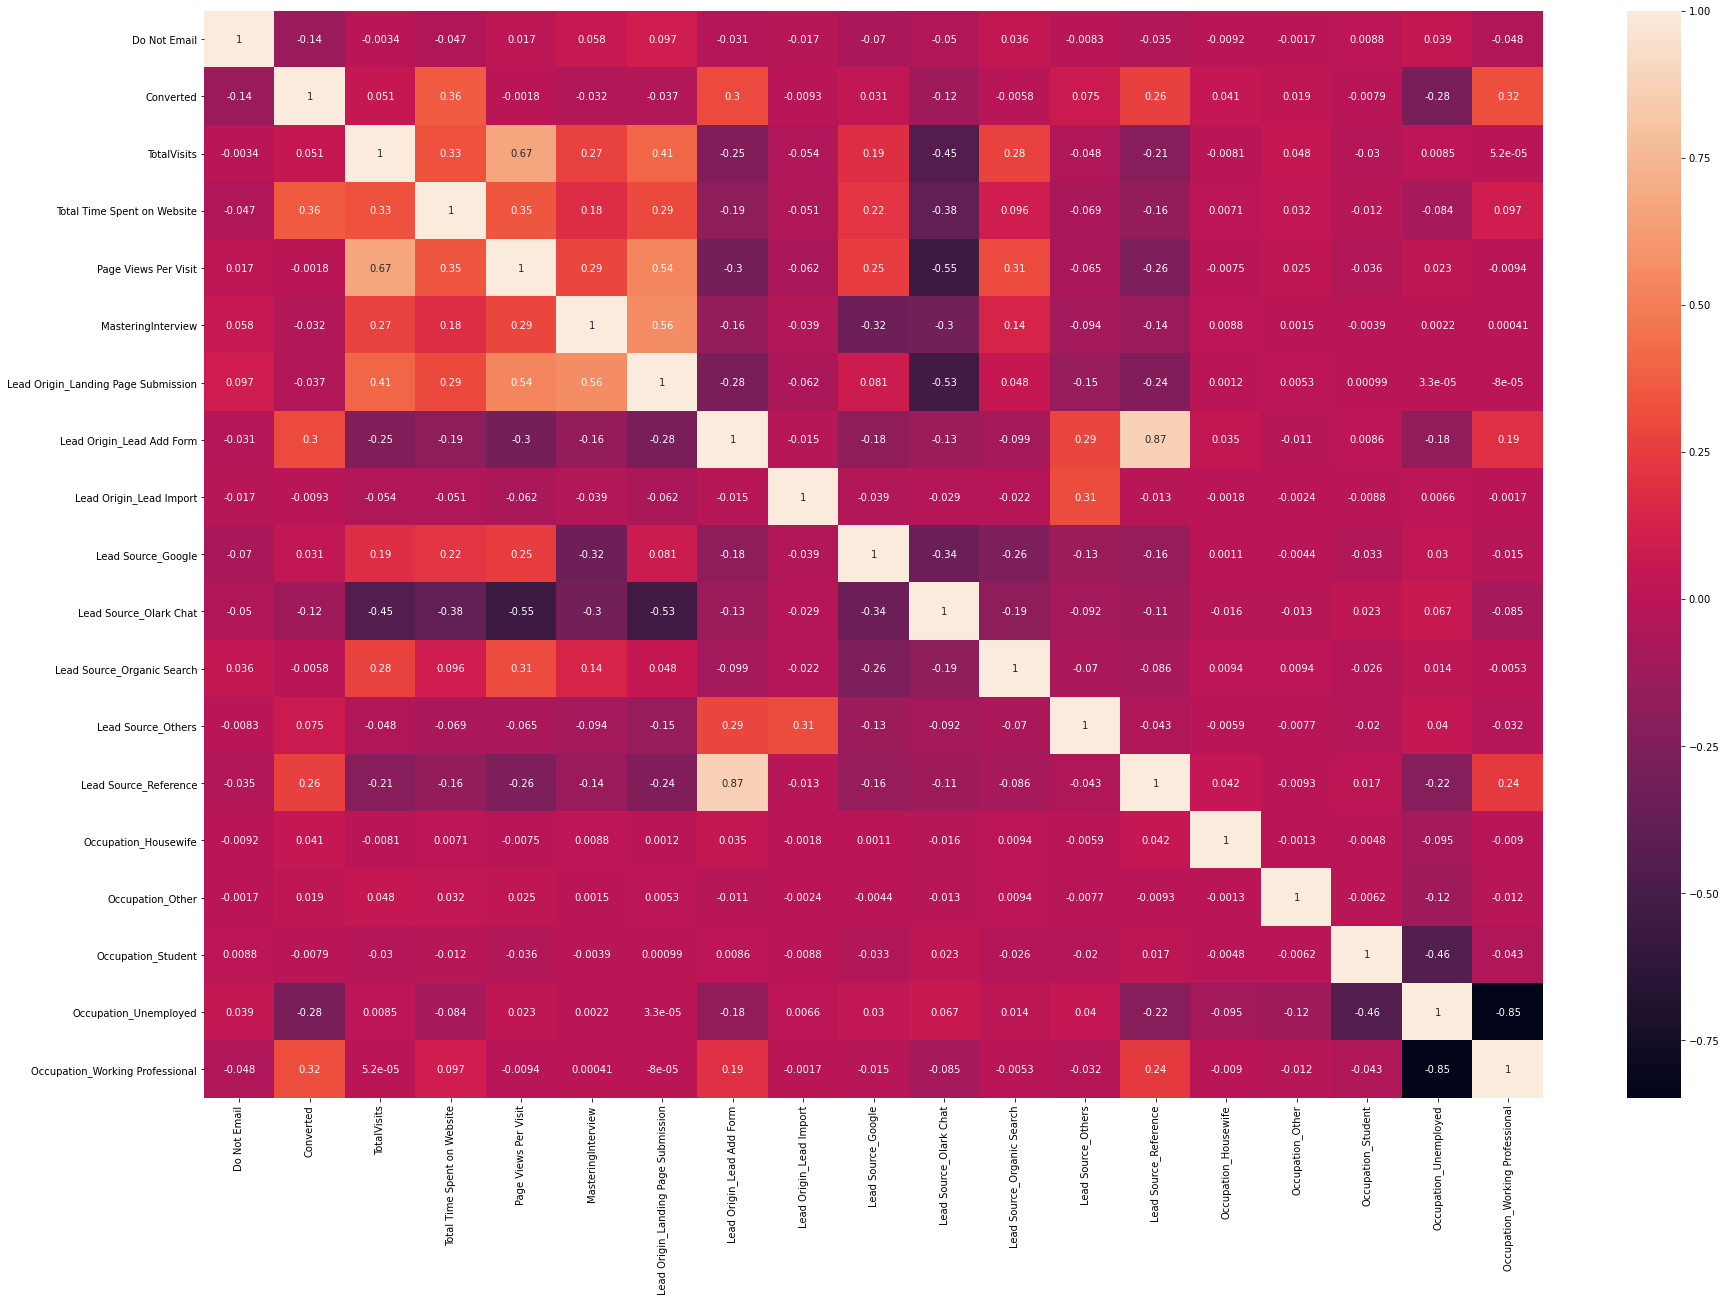

In [107]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))
sns.heatmap(Lead_data.corr(),annot = True)
plt.show()

#### Dropping highly correlated variables

In [109]:
X_test = X_test.drop(['Occupation_Unemployed','Lead Source_Reference'], 1)
X_train = X_train.drop(['Occupation_Unemployed','Lead Source_Reference'], 1)

In [110]:
X_test.shape

(2695, 16)

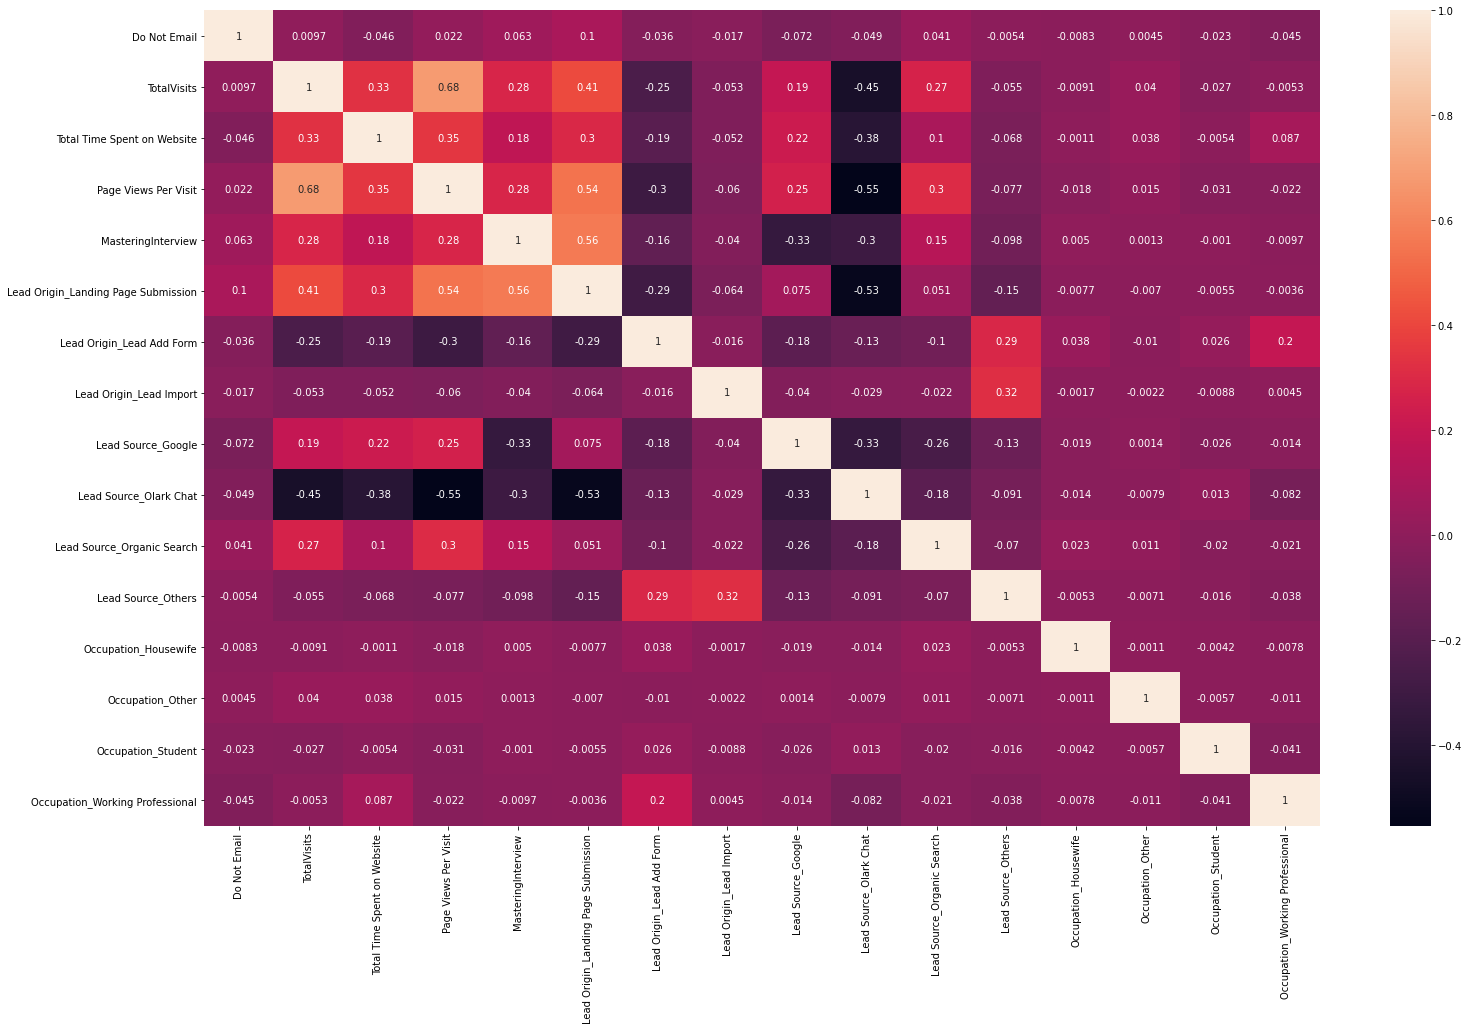

In [111]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,15))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### 10. Model Building

In [112]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,MasteringInterview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Working Professional
697,0,-0.386239,-0.207206,-0.147908,1,1,0,0,0,0,0,0,0,0,0,0
1708,0,-0.071041,-0.369720,0.378441,1,1,0,0,0,0,1,0,0,0,0,0
2196,0,0.244157,1.879625,0.904790,0,0,0,0,1,0,0,0,0,0,0,0
7113,0,-0.071041,0.265563,-0.411082,1,1,0,0,1,0,0,0,0,0,0,1
196,0,0.244157,-0.247834,0.904790,0,0,0,0,0,0,1,0,0,0,0,0


In [113]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6287
Model:                            GLM   Df Residuals:                     6270
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2973.1
Date:                Mon, 12 Jul 2021   Deviance:                       5946.2
Time:                        15:36:45   Pearson chi2:                 6.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3351      0.117    -11.384      0.000      -1.565      -1.105
Do Not Email                           -1.4095      0.163     -8.640      0.000      -1.729      -1.090
TotalVisits                             0.1973      0.043      4.537      0.000       0.112       0.282
Total Time Spent on Website             1.1045      0.038     29.005      0.000       1.030       1.179
Page Views Per Visit                   -0.0267      0.052     -0.518      0.605      -0.128       0.074
MasteringInterview                     -0.0281      0.100     -0.280      0.779      -0.224       0.168
Lead Origin_Landing Page Submission     0.0509      0.098      0.518      0.605      -0.142       0.244
Lead Origin_Lead Add Form               4.8395      0.245     19.745      0.000       4.359       5.320
Lead Origin_Lead Import                 1.3006      0.549      2.369      0.018       0.225       2.377
Lead Source_Google                      0.2882      0.106      2.722      0.006       0.081       0.496
Lead Source_Olark Chat                  1.2657      0.148      8.571      0.000       0.976       1.555
Lead Source_Organic Search              0.1641      0.119      1.376      0.169      -0.070       0.398
Lead Source_Others                      0.1246      0.241      0.517      0.605      -0.348       0.597
Occupation_Housewife                   22.9059   1.76e+04      0.001      0.999   -3.45e+04    3.46e+04
Occupation_Other                        0.1414      0.734      0.193      0.847      -1.297       1.580
Occupation_Student                      0.1684      0.213      0.790      0.429      -0.249       0.586
Occupation_Working Professional         2.7775      0.181     15.380      0.000       2.424       3.132
=======================================================================================================
"""

### 11: Feature Selection Using RFE

In [114]:
logreg = LogisticRegression()

In [115]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [116]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [117]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('MasteringInterview', True, 1),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', True, 1),
 ('Occupation_Student', True, 1),
 ('Occupation_Working Professional', True, 1)]

In [118]:
col = X_train.columns[rfe.support_]

In [119]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission'], dtype='object')

In [120]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6287
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2973.2
Date:                Mon, 12 Jul 2021   Deviance:                       5946.5
Time:                        15:37:42   Pearson chi2:                 6.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3016      0.098    -13.320      0.000      -1.493      -1.110
Do Not Email                       -1.4064      0.163     -8.626      0.000      -1.726      -1.087
TotalVisits                         0.1968      0.043      4.530      0.000       0.112       0.282
Total Time Spent on Website         1.1043      0.038     29.003      0.000       1.030       1.179
Page Views Per Visit               -0.0201      0.050     -0.403      0.687      -0.118       0.078
MasteringInterview                 -0.0114      0.095     -0.121      0.904      -0.197       0.175
Lead Origin_Lead Add Form           4.8182      0.242     19.938      0.000       4.345       5.292
Lead Origin_Lead Import             1.2915      0.549      2.354      0.019       0.216       2.367
Lead Source_Google                  0.2811      0.105      2.677      0.007       0.075       0.487
Lead Source_Olark Chat              1.2384      0.138      8.983      0.000       0.968       1.509
Lead Source_Organic Search          0.1475      0.115      1.284      0.199      -0.078       0.373
Lead Source_Others                  0.1058      0.238      0.445      0.656      -0.360       0.572
Occupation_Housewife               22.9184   1.76e+04      0.001      0.999   -3.45e+04    3.45e+04
Occupation_Other                    0.1313      0.734      0.179      0.858      -1.307       1.569
Occupation_Student                  0.1692      0.213      0.794      0.427      -0.248       0.587
Occupation_Working Professional     2.7803      0.181     15.399      0.000       2.426       3.134
===================================================================================================
"""

- There are columns which have high p-value, those columns have to be removed from the model

In [121]:
## Removing "Occupation_Housewife" from the dataset
col = col.drop('Occupation_Housewife', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'MasteringInterview',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Working Professional'],
      dtype='object')

In [122]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6287
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2977.0
Date:                Mon, 12 Jul 2021   Deviance:                       5954.0
Time:                        16:13:41   Pearson chi2:                 6.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3006      0.098    -13.318      0.000      -1.492      -1.109
Do Not Email                       -1.4097      0.163     -8.647      0.000      -1.729      -1.090
TotalVisits                         0.1961      0.043      4.516      0.000       0.111       0.281
Total Time Spent on Website         1.1034      0.038     29.004      0.000       1.029       1.178
Page Views Per Visit               -0.0231      0.050     -0.464      0.643      -0.121       0.075
MasteringInterview                 -0.0068      0.095     -0.071      0.943      -0.193       0.179
Lead Origin_Lead Add Form           4.8204      0.241     19.962      0.000       4.347       5.294
Lead Origin_Lead Import             1.2886      0.549      2.349      0.019       0.213       2.364
Lead Source_Google                  0.2817      0.105      2.684      0.007       0.076       0.487
Lead Source_Olark Chat              1.2326      0.138      8.948      0.000       0.963       1.503
Lead Source_Organic Search          0.1572      0.115      1.371      0.170      -0.068       0.382
Lead Source_Others                  0.1036      0.238      0.435      0.663      -0.363       0.570
Occupation_Other                    0.1306      0.734      0.178      0.859      -1.307       1.568
Occupation_Student                  0.1669      0.213      0.783      0.434      -0.251       0.584
Occupation_Working Professional     2.7775      0.181     15.385      0.000       2.424       3.131
===================================================================================================
"""

In [123]:
## Removing "MasteringInterview" from the dataset as it have a very high p-value
col = col.drop('MasteringInterview', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Working Professional'],
      dtype='object')

In [124]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6287
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2977.0
Date:                Mon, 12 Jul 2021   Deviance:                       5954.0
Time:                        16:14:39   Pearson chi2:                 6.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3056      0.068    -19.277      0.000      -1.438      -1.173
Do Not Email                       -1.4095      0.163     -8.647      0.000      -1.729      -1.090
TotalVisits                         0.1958      0.043      4.537      0.000       0.111       0.280
Total Time Spent on Website         1.1033      0.038     29.020      0.000       1.029       1.178
Page Views Per Visit               -0.0232      0.050     -0.465      0.642      -0.121       0.075
Lead Origin_Lead Add Form           4.8238      0.237     20.382      0.000       4.360       5.288
Lead Origin_Lead Import             1.2899      0.548      2.353      0.019       0.215       2.364
Lead Source_Google                  0.2862      0.083      3.442      0.001       0.123       0.449
Lead Source_Olark Chat              1.2369      0.124      9.985      0.000       0.994       1.480
Lead Source_Organic Search          0.1592      0.111      1.434      0.152      -0.058       0.377
Lead Source_Others                  0.1068      0.234      0.457      0.647      -0.351       0.565
Occupation_Other                    0.1314      0.733      0.179      0.858      -1.306       1.569
Occupation_Student                  0.1670      0.213      0.784      0.433      -0.251       0.584
Occupation_Working Professional     2.7778      0.180     15.389      0.000       2.424       3.132
===================================================================================================
"""

In [125]:
## Removing "Occupation_Other" from the dataset as it have a very high p-value
col = col.drop('Occupation_Other', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Occupation_Student',
       'Occupation_Working Professional'],
      dtype='object')

In [126]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6287
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2977.0
Date:                Mon, 12 Jul 2021   Deviance:                       5954.1
Time:                        16:15:05   Pearson chi2:                 6.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3054      0.068    -19.277      0.000      -1.438      -1.173
Do Not Email                       -1.4089      0.163     -8.647      0.000      -1.728      -1.090
TotalVisits                         0.1961      0.043      4.549      0.000       0.112       0.281
Total Time Spent on Website         1.1035      0.038     29.045      0.000       1.029       1.178
Page Views Per Visit               -0.0233      0.050     -0.468      0.640      -0.121       0.074
Lead Origin_Lead Add Form           4.8241      0.237     20.383      0.000       4.360       5.288
Lead Origin_Lead Import             1.2904      0.548      2.354      0.019       0.216       2.365
Lead Source_Google                  0.2861      0.083      3.441      0.001       0.123       0.449
Lead Source_Olark Chat              1.2372      0.124      9.988      0.000       0.994       1.480
Lead Source_Organic Search          0.1591      0.111      1.433      0.152      -0.059       0.377
Lead Source_Others                  0.1065      0.234      0.456      0.648      -0.351       0.564
Occupation_Student                  0.1667      0.213      0.783      0.434      -0.251       0.584
Occupation_Working Professional     2.7775      0.180     15.388      0.000       2.424       3.131
===================================================================================================
"""

In [127]:
## Removing "Lead Source_Others" from the dataset as it have a very high p-value
col = col.drop('Lead Source_Others', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Occupation_Student', 'Occupation_Working Professional'],
      dtype='object')

In [128]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6287
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2977.1
Date:                Mon, 12 Jul 2021   Deviance:                       5954.3
Time:                        16:15:50   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.2998      0.067    -19.534      0.000      -1.430      -1.169
Do Not Email                       -1.4083      0.163     -8.648      0.000      -1.727      -1.089
TotalVisits                         0.1964      0.043      4.559      0.000       0.112       0.281
Total Time Spent on Website         1.1031      0.038     29.049      0.000       1.029       1.178
Page Views Per Visit               -0.0230      0.050     -0.462      0.644      -0.121       0.075
Lead Origin_Lead Add Form           4.8514      0.230     21.125      0.000       4.401       5.301
Lead Origin_Lead Import             1.3916      0.501      2.775      0.006       0.409       2.374
Lead Source_Google                  0.2806      0.082      3.412      0.001       0.119       0.442
Lead Source_Olark Chat              1.2320      0.123      9.992      0.000       0.990       1.474
Lead Source_Organic Search          0.1533      0.110      1.390      0.165      -0.063       0.369
Occupation_Student                  0.1647      0.213      0.773      0.440      -0.253       0.582
Occupation_Working Professional     2.7748      0.180     15.382      0.000       2.421       3.128
===================================================================================================
"""

In [129]:
## Removing "Page Views Per Visit" from the dataset as it have a very high p-value
col = col.drop('Page Views Per Visit', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Occupation_Student',
       'Occupation_Working Professional'],
      dtype='object')

In [130]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6287
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2977.2
Date:                Mon, 12 Jul 2021   Deviance:                       5954.5
Time:                        16:16:13   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3041      0.066    -19.793      0.000      -1.433      -1.175
Do Not Email                       -1.4064      0.163     -8.639      0.000      -1.725      -1.087
TotalVisits                         0.1873      0.038      4.890      0.000       0.112       0.262
Total Time Spent on Website         1.1029      0.038     29.047      0.000       1.028       1.177
Lead Origin_Lead Add Form           4.8735      0.225     21.691      0.000       4.433       5.314
Lead Origin_Lead Import             1.4099      0.500      2.820      0.005       0.430       2.390
Lead Source_Google                  0.2789      0.082      3.395      0.001       0.118       0.440
Lead Source_Olark Chat              1.2537      0.114     10.988      0.000       1.030       1.477
Lead Source_Organic Search          0.1460      0.109      1.338      0.181      -0.068       0.360
Occupation_Student                  0.1647      0.213      0.772      0.440      -0.253       0.583
Occupation_Working Professional     2.7751      0.180     15.383      0.000       2.422       3.129
===================================================================================================
"""

In [131]:
## Removing "Occupation_Student" from the dataset as it have a very high p-value
col = col.drop('Occupation_Student', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Occupation_Working Professional'],
      dtype='object')

In [132]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6287
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2977.5
Date:                Mon, 12 Jul 2021   Deviance:                       5955.1
Time:                        16:16:32   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.2993      0.066    -19.817      0.000      -1.428      -1.171
Do Not Email                       -1.4096      0.163     -8.660      0.000      -1.729      -1.091
TotalVisits                         0.1869      0.038      4.882      0.000       0.112       0.262
Total Time Spent on Website         1.1031      0.038     29.053      0.000       1.029       1.178
Lead Origin_Lead Add Form           4.8753      0.225     21.702      0.000       4.435       5.316
Lead Origin_Lead Import             1.4051      0.500      2.811      0.005       0.425       2.385
Lead Source_Google                  0.2772      0.082      3.376      0.001       0.116       0.438
Lead Source_Olark Chat              1.2533      0.114     10.985      0.000       1.030       1.477
Lead Source_Organic Search          0.1446      0.109      1.326      0.185      -0.069       0.358
Occupation_Working Professional     2.7713      0.180     15.367      0.000       2.418       3.125
===================================================================================================
"""

In [133]:
## Removing "Lead Source_Organic Search	" from the dataset as it have a very high p-value
col = col.drop('Lead Source_Organic Search', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Occupation_Working Professional'],
      dtype='object')

In [134]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6287
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2978.4
Date:                Mon, 12 Jul 2021   Deviance:                       5956.8
Time:                        16:16:52   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.2569      0.057    -22.107      0.000      -1.368      -1.145
Do Not Email                       -1.4092      0.163     -8.666      0.000      -1.728      -1.091
TotalVisits                         0.1949      0.038      5.162      0.000       0.121       0.269
Total Time Spent on Website         1.1029      0.038     29.050      0.000       1.028       1.177
Lead Origin_Lead Add Form           4.8408      0.223     21.709      0.000       4.404       5.278
Lead Origin_Lead Import             1.3696      0.499      2.744      0.006       0.391       2.348
Lead Source_Google                  0.2325      0.075      3.113      0.002       0.086       0.379
Lead Source_Olark Chat              1.2182      0.111     11.006      0.000       1.001       1.435
Occupation_Working Professional     2.7693      0.180     15.351      0.000       2.416       3.123
===================================================================================================
"""

#### Checking VIFs

In [135]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,1.37
6,Lead Source_Olark Chat,1.34
2,Total Time Spent on Website,1.28
3,Lead Origin_Lead Add Form,1.20
7,Occupation_Working Professional,1.12
5,Lead Source_Google,1.09
0,Do Not Email,1.02
4,Lead Origin_Lead Import,1.01


In [137]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

697     0.173554
1708    0.157301
2196    0.749544
7113    0.883293
196     0.185035
2160    0.068119
4913    0.826730
8051    0.583751
8771    0.230284
5859    0.160699
dtype: float64

In [138]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17355442, 0.15730076, 0.74954413, 0.88329252, 0.18503498,
       0.06811857, 0.82673045, 0.58375135, 0.23028398, 0.16069852])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [139]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ProspectID
0,0,0.173554,697
1,0,0.157301,1708
2,1,0.749544,2196
3,1,0.883293,7113
4,0,0.185035,196


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [140]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,ProspectID,predicted
0,0,0.173554,697,0
1,0,0.157301,1708,0
2,1,0.749544,2196,1
3,1,0.883293,7113,1
4,0,0.185035,196,0


In [141]:
from sklearn import metrics

In [142]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3463  455]
 [ 893 1476]]


In [143]:
# Predicted     not_Converted    converted
# Actual
# not_Converted        3463      455
# converted            893       1476  

In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7855893112772387


### 12: Sensitivity and Specificity

In [145]:
confusion

array([[3463,  455],
       [ 893, 1476]], dtype=int64)

In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6230476994512453

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.8838693210821847

In [149]:
# Calculate false postive rate - predicting conversion
print(FP/ float(TN+FP))

0.11613067891781521


In [150]:
# positive predictive value 
print (TP / float(TP+FP))

0.7643707923355775


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7949954086317723


In [152]:
# Precision
print(TP/(TP+FP))

0.7643707923355775


In [153]:
# Recall
print(TP/(TP+FN))

0.6230476994512453


### 13: ROC curve

In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

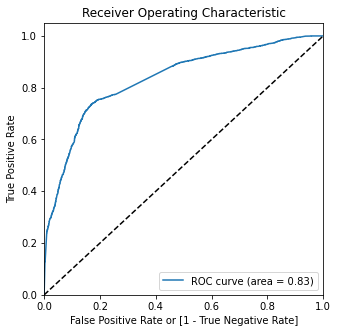

In [156]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### 14: Finding Optimal Cutoff Point

In [157]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.173554,697,0,1,1,0,0,0,0,0,0,0,0
1,0,0.157301,1708,0,1,1,0,0,0,0,0,0,0,0
2,1,0.749544,2196,1,1,1,1,1,1,1,1,1,0,0
3,1,0.883293,7113,1,1,1,1,1,1,1,1,1,1,0
4,0,0.185035,196,0,1,1,0,0,0,0,0,0,0,0


In [158]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376809  1.000000  0.000000
0.1   0.1  0.442182  0.991558  0.110005
0.2   0.2  0.643868  0.902913  0.487238
0.3   0.3  0.790520  0.745040  0.818019
0.4   0.4  0.797678  0.698607  0.857580
0.5   0.5  0.785589  0.623048  0.883869
0.6   0.6  0.769206  0.528071  0.915008
0.7   0.7  0.746461  0.415365  0.946656
0.8   0.8  0.722443  0.306881  0.973711
0.9   0.9  0.709559  0.245251  0.990301


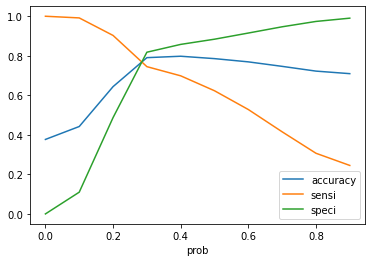

In [159]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- It can be seen from the above graph that 0.3 is the optimum point to take it as a cutoff probability.

In [160]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.173554,697,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.157301,1708,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.749544,2196,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.883293,7113,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.185035,196,0,1,1,0,0,0,0,0,0,0,0,0


In [161]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7905201208843645

### 15: Making predictions on the test set

In [162]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [163]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Occupation_Working Professional
7473,0,0.244157,-0.532234,0,0,0,0,0
1012,1,-0.386239,-0.528541,0,0,0,0,1
5196,0,-0.386239,-0.855416,0,0,1,0,0
3697,0,-1.016634,-0.879424,0,0,0,1,0
2528,0,-0.071041,-0.646733,0,0,0,0,0


In [164]:
X_test_sm = sm.add_constant(X_test)

In [165]:
y_test_pred = res.predict(X_test_sm)

In [166]:
y_test_pred[:10]

7473    0.142307
1012    0.364718
5196    0.114754
3697    0.230284
2528    0.120897
4731    0.113114
289     0.228669
6432    0.230284
4090    0.130057
3760    0.230284
dtype: float64

In [167]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7473,0.142307
1012,0.364718
5196,0.114754
3697,0.230284
2528,0.120897


In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [169]:
# Putting ProspectID to index
y_test_df['ProspectID'] = y_test_df.index

In [170]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [172]:
y_pred_final.head()

,Converted,ProspectID,0
0,0,7473,0.142307
1,0,1012,0.364718
2,1,5196,0.114754
3,0,3697,0.230284
4,0,2528,0.120897


In [173]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [174]:
# Rearranging the columns
y_pred_final = y_pred_final[['ProspectID','Converted','Converted_prob']]

In [175]:
y_pred_final.head()

,ProspectID,Converted,Converted_prob
0,7473,0,0.142307
1,1012,0,0.364718
2,5196,1,0.114754
3,3697,0,0.230284
4,2528,0,0.120897


In [176]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [177]:
y_pred_final.head()

,ProspectID,Converted,Converted_prob,final_predicted
0,7473,0,0.142307,0
1,1012,0,0.364718,1
2,5196,1,0.114754,0
3,3697,0,0.230284,0
4,2528,0,0.120897,0


In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7985157699443414

In [179]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1366,  301],
       [ 242,  786]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7645914396887159

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.8194361127774445

In [183]:
# Precision
print(TP/(TP+FP))

0.7230910763569457


In [184]:
# Recall
print(TP/(TP+FN))

0.7645914396887159


### 16: Calculating Lead Score on Test data

In [185]:
y_pred_final.head()

,ProspectID,Converted,Converted_prob,final_predicted
0,7473,0,0.142307,0
1,1012,0,0.364718,1
2,5196,1,0.114754,0
3,3697,0,0.230284,0
4,2528,0,0.120897,0


In [186]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [187]:
y_pred_final.head()

,ProspectID,Converted,Converted_prob,final_predicted,Lead_Score
0,7473,0,0.142307,0,14
1,1012,0,0.364718,1,36
2,5196,1,0.114754,0,11
3,3697,0,0.230284,0,23
4,2528,0,0.120897,0,12


### 17: Final Observations

- Test Data:
    - Accuracy : 0.799
    - Sensitivity : 0.765
    - Specificity : 0.819
    - Precision : 0.723
    - Recall : 0.765

- Top 3 Variables :
    - Lead Origin_Lead Add Form
    - Occupation_Working Professional
    - Lead Origin_Lead Import